In [2]:
# setup
from IPython.core.display import display,HTML
display(HTML('<style>.prompt{width: 0px; min-width: 0px; visibility: collapse}</style>'))
display(HTML(open('rise.css').read()))

# imports
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style="whitegrid", font_scale=1.5, rc={'figure.figsize':(12, 8)})


# CMPS 2200
# Introduction to Algorithms

## Overview


Today's agenda:

- Introductions
- Motivation for course
- Formalisms used throughout the course
- Navigating the course

## Course Overview

- **Analyzing algorithms**: methods to compute tight bounds on running time
- **Designing algorithms**: various approaches to designing efficient algorithms
  - lists, sequences, trees, graphs,...
- Distinct from typical courses like this, we will emphasize **parallel** algorithms from the start (next lecture)


## Navigating the course

- Canvas: syllabus, modules, grades
- Diderot: interactive textbook (not ready); PDF version is ready
- Github: assignments, slides
 
> **Workload**: 6 Quizzes (6\%), 8 Lab recitations (20\%), 4 Assignments (24\%), 2 Exams (Mid 20\%, Final 24\%), Attendance (6\%) [Refer to <a href='https://tulane.instructure.com/courses/2289963/assignments/syllabus'>Syllabus</a>]

> **Basic Skills**: Python + Math [e.g., Linear Algebra]


## What is an algorithm?

>  an explicit, precise, unambiguous, mechanically-executable sequence of elementary instructions, usually intended to accomplish a specific purpose.

-- [Jeff Erickson](https://jeffe.cs.illinois.edu/teaching/algorithms/)

Examples?

### Bottles of Beer on the Wall: BOB(n):  

- for $i$ from $n$ down to 1  
  - Sing “$i$ bottles of beer on the wall, $i$ bottles of beer,”  
  - Sing “Take one down, pass it around, $i-1$ bottles of beer on the wall.”  
- Sing “No bottles of beer on the wall, no bottles of beer,”  
- Sing “Go to the store, buy some more, n bottles of beer on the wall.”  


## What makes a good algorithm?

- correct
- user-friendly
- many features
- robust
- simple
- secure
- **efficient**
  - runs quickly  
  - requires little memory

## Then, why study efficiency?

- separates feasible from infeasible
- correlates with user-friendliness

> What if it took ChatGPT $\color{red}{\text{"2"}}$ minutes to return results?

Simple warmup: **What does this do?**

In [1]:
def my_function(a, b):
    for i,v in enumerate(a):
        if v == b:
            return i
    return -1

In [2]:
a = [1, 2, 3]
for i, v in enumerate(a):
    print(i, v, '\n')

0 1 

1 2 

2 3 



### More professional one

In [3]:
def linear_search(mylist, key):
    """
    Args:
      mylist...a list
      key......a search key
    Returns:
      index of key in mylist; -1 if not present
    """
    for i,v in enumerate(mylist):
        if v == key:
            return i 
    return -1
 
linear_search([5,1,10,7,12,4,2], 12)

4

What factors affect the running time of this algorithm?

- Input **size**
- Input **values**: is key at start or end?
- Hardware!
  - TI-85 vs. Supercomputer
  - CPU, GPU, TPU

We need a way to compare the efficiency of algorithms that abstracts away details of hardware and input. $\color{red}{\text{Why?}}$

### Analysis of Linear Search

> **Naive Way**: Analysis based on the programming language

```python
def linear_search(mylist, key):     #   cost     frequency
    for i,v in enumerate(mylist):   #   c1           ?
        if v == key:                #   c2           ?
            return i                #   c3           ?
    return -1                       #   c4           ?

```

<br>

- Assign a time cost $c_i$ to each line $i$.
- Figure out how often each line is run $n_i$ [frequency]
- total cost is the cost per line multiplied by the number of times it is run


$
\hbox{Cost(linear-search, mylist, key)} = \sum_i c_i * n_i
$

### Best/Average/Worst case

To deal with the effects of the input values on performance, we can consider three types of analysis:



- **Worst-case**: maximum time for any input of size $n$

```python
linear_search([5,1,10,7,12,4,2], 9999)
```

- **Best case**: minimum time of any input of size $n$

```python
linear_search([5,1,10,7,12,4,2], 5)
```

- **Average case**: expected time over all inputs of size *n*
    - Need some probability distribution over inputs
    
```python
for (mylist, key) in ???:
    linear_search(mylist, key)
```

### Which one do we need to analyze?
$\color{red}{\text{Best/Average/Worst case?}}$

Buckets effect

![dag-sum](figures/Buckets_effect.png) 


### Worst-case analysis of linear search

Assume $n \leftarrow$ `len(mylist)`

In [1]:
def linear_search(mylist, key):        #   cost         number of times run
    for i,v in enumerate(mylist):      #   c1               ?
        if v == key:                   #   c2               ?
            return i                   #   c3               ?
    return -1                          #   c4               ?

$ \hbox{Cost(linear-search, } n) = c_1n + c_2n + c_4$

**Cost is now just a function of:**

- input size $n$
- constants $c$ (depend on machine, compiler, etc)

### How granular should we get?

Consider this slightly different implementation:

In [30]:
def new_linear_search(mylist, key):    #   cost         number of times run
    for i in range(len(mylist)):       #   c5               n
        if mylist[i] == key:           #   c6               n
            return i                   #   c3               0
    return -1                          #   c4               1

$
\begin{align}
\hbox{Cost(new-linear-search, } n) = c_5n + c_6n + c_4 = f_1(n)\\
\hbox{Cost(linear-search, } n) = c_1n + c_2n + c_4 = f_2(n)
\end{align}
$

<br>
<br>
$\color{red}{\text{Question:}}$ Which one is better?


### Big Idea: Asymptotic Analysis

- Ignore machine-dependent constants
- Focus on **growth** of running time
  - What happens in the limit as $n \rightarrow \infty$ https://en.wikipedia.org/wiki/Limit_(mathematics)

$ c_1n + c_2n + c_4 \approx c_5n + c_6n + c_4 $



> What is the limit of $\dfrac{f_1(n)}{f_2(n)}$?

e.g., consider two algorithms with running times:

- algorithm 1: $g_1(n) = c_1 n + c_2$
- algorithm 2: $g_2(n) = c_3 n^2 + c_4 n + c_5$

### Which one is better?


Depending on the machine-dependent constants, algorithm 2 may sometimes be faster than algorithm 1:


<br><br>
<br>
<br>
<br>
<br>
<br>


- algorithm 1: $g_1(n) = 120n - 2000$
- algorithm 2: $g_2(n) = n^2$

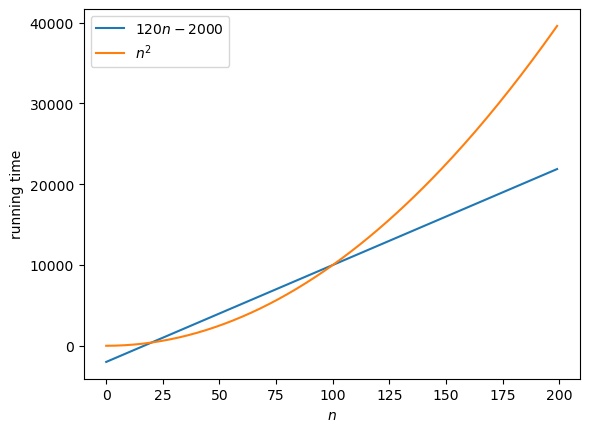

In [4]:
import numpy as np
import matplotlib.pyplot as plt



n = np.arange(200)
time1 = 120*n - 2000
time2 = n*n

# plot
plt.figure()
plt.plot(n, time1, label='$120 n - 2000$')
plt.plot(n, time2, label='$n^2$')
plt.xlabel("$n$")
plt.ylabel('running time')
plt.legend()
plt.show()

But, as $n \rightarrow \infty$, there will be a point at which algorithm 2 will be slower, **no matter which machine it is run on**

<br>

> What is the limit of $\dfrac{g_1(n)}{g_2(n)}$?


### Definition: Asymptotic dominance

The costs of two algorithms are the functions of $n$, e.g., $f(n),~~g(n)$.

Function $f(n)$ **asymptotically dominates** function $g(n)$ if **there exist** constants $c$ and $n_0$ such that

$$ c \cdot f(n) \ge g(n)~~~ \text{for all}~~ n \ge n_0$$

<br>
<p align="center">
<img src="figures/BigO.png" alt="drawing" width="900"/>
</p>



####  Upper Bound: 

> $f(n)$ is the upper bound of $g(n)$

> $g(n) \in \mathcal{O} (f(n))$

> $
\begin{align}
\mathcal{O} (f(n)) & = \{ g(n) \mid f(n) \hbox{ asymptotically dominates } g(n)\}
\end{align}
$

e.g., $n^2$ asymptotically dominates $120 n - 2000$

**Proof:**

Find $c$ and $n_0$ such that

$120 n - 2000 \leq c*n^2$  for all $n>n_0$

<br>

Let $c=1$. Find an $n_0$ such that 

$
120 n - 2000 \leq n^2 \\
$
for all $n \ge n_0$

$
\begin{align}
120n - 2000 & \leq n^2 \\
0 & \leq n^2 - 120n + 2000\\
0 & \leq (n-100)(n-20)\\
\end{align}
$


When $n=100$, $120n - 2000 = n^2 $

For all $n \ge 100$, $120n - 2000 \le n^2 $

So, $c=1, n_0=100$ satisfies the definition of asymptotic dominance.

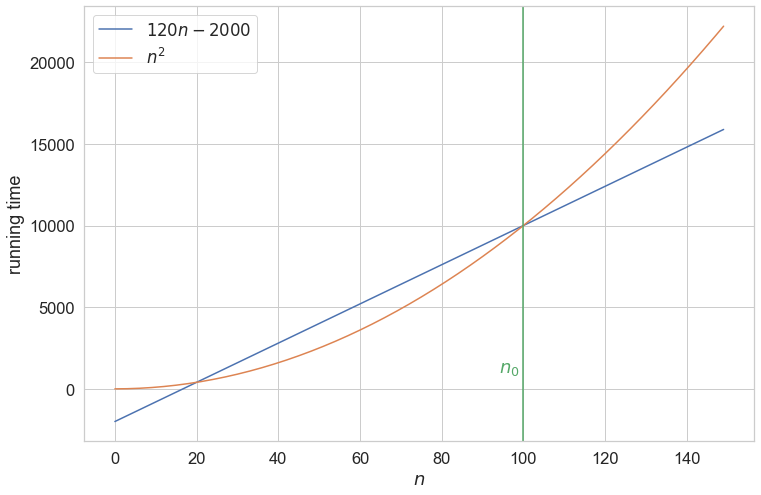

In [32]:
# show n_0
n = np.arange(150)
time1 = 120*n + - 2000
time2 = n*n

# plot
plt.figure()
plt.plot(n, time1, label='$120 n - 2000$')
plt.plot(n, time2, label='$n^2$')
plt.axvline(100, color='g')
plt.text(94,1000,'$n_0$', fontsize=18, color='g')
plt.xlabel("$n$")
plt.ylabel('running time')
plt.legend()
plt.show()

## Asymptotic Notation

Beyond Big-O, we also have



> Lower Bound

$$
\begin{align}
\Omega (f(n)) & =  \{ g(n) \mid  g(n) \hbox{ asymptotically dominates } f(n)\}\\
& \Rightarrow cf(n) \le g(n), ~~\text{when}~~~n\ge n_0\\
& \Rightarrow g(n) \in \Omega(f(n)).
\end{align}
$$

<p align="center">
<img src="figures/BigOmega.png" alt="drawing" width="900"/>
</p>





> Tight Bound

$$
\begin{align}
\Theta (f(n)) & =  \mathcal{O} (f(n)) \cap \Omega (f(n))\\
& \Rightarrow c_1f(n) \ge g(n) \ge c_2f(n), ~~\text{when}~~~n\ge n_0\\
& \Rightarrow g(n) \in \Theta(f(n)).
\end{align}
$$

<img src="figures/BigTheta.jpeg" alt="drawing" width="900"/>




e.g.

$120 n - 2000 \in \mathcal{O}(n^2)$

$ 10n^3 + 2n^2 - 100 \in \Omega(n^2) $

$ 14n^2 - 5n +50 \in \Theta(n^2) $


<br><br>
We often abuse notation such as

$120 n - 2000 = \mathcal{O}(n^2)$

or

$120 n - 2000 \mathrm{~is~} \mathcal{O}(n^2)$



## Limit Method
![dag-sum](figures/an1.png) 

<!-- <br><br>
Analogy:

|$\mathcal{O}~~~$ | $\Omega~~~$ | $\Theta~~~$ | $\mathcal{o}~~~$ | $\omega~~~$ |
|--------------|----------|----------|---------------|----------|
| $\leq~~~$       | $\geq~~~$   | $=~~~$      | $\lt~~~$         | $\gt~~~$    |     -->

## More Example

> Please compare the following time cost function with $g(n) = n$

$$f_1(n) = 2n$$

$$f_2(n) = \sqrt{n}$$

$$f_3(n) = n\sqrt{n}$$

$$f_4(n) = \log(n)$$

$$f_5(n) = \log^k(n)~~ \text{for} ~~k>1$$


<span style="color:red">**Test Samples**</span>: 

$$2n + \log^3(n) \in \mathcal{O}(n^2), ~\color{red}{\text{Ture or False?}}$$

$$3n^2-2n+7\log(n) \in \Theta(n^2), ~\color{red}{\text{Ture or False?}}$$


$$5n^2\log(n)+\sqrt{n} \in \Omega(n^2), ~\color{red}{\text{Ture or False?}}$$


![dag-sum](figures/an2.png) 


<a href='https://github.com/allan-tulane/CMPS2200-Slides/blob/main/module-01-cost/01-intro/asymptoticDominance.pdf'>More</a> Asymptotic Dominance